In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

# min max
def mm_norm(x):
    return (x - x.min()) / (x.max() - x.min())

def mm_denorm(x_norm, original_min=None, original_max=None):
    if original_max is None or original_min is None:
        return x_norm * (x_norm.max() - x_norm.min()) + x_norm.min()
    else:
        return x_norm * (original_max - original_min) + original_min

def load_numpy_files_by_type(root_folder_path, file_types,norm_out=False,denorm=False):
    all_file_groups = {ftype: [] for ftype in file_types}

    # Traverse all subdirectories
    for testcase_folder in os.listdir(root_folder_path):
        folder_path = os.path.join(root_folder_path, testcase_folder)
        if os.path.isdir(folder_path):
            # Load all .npy files by type within each folder
            for ftype in file_types:
                files = glob.glob(os.path.join(folder_path, f'*{ftype}.npy'))
                for file in files:
                    data = np.load(file)
                    data_min, data_max = data.min(), data.max()
                    if norm_out : data = mm_norm(data)
                    if denorm : data = mm_denorm(data,data_min,data_max)
                    all_file_groups[ftype].append(data)
    
    return all_file_groups

def plot_pixel_value_histograms_for_all_data(all_file_groups, file_types):
    # Iterate through each file type
    for ftype in file_types:
        print(f"\nGenerating histogram for file type: {ftype}")
        data_list = all_file_groups[ftype]
        plot_pixel_value_histogram(data_list, ftype)

def plot_pixel_value_histogram(data_list, file_type):
    # Filter out any empty arrays
    valid_arrays = [data.flatten() for data in data_list if data.size > 0]
    
    if len(valid_arrays) == 0:
        print(f"No valid arrays found for {file_type}")
        return
    
    # Flatten all valid arrays and concatenate them into one array
    pixel_values = np.concatenate(valid_arrays)
    
    # Calculate pixel value statistics
    min_pixel = np.min(pixel_values)
    max_pixel = np.max(pixel_values)
    mean_pixel = np.mean(pixel_values)
    std_pixel = np.std(pixel_values)

    # Print pixel value statistics
    print(f"Pixel value statistics for {file_type}:")
    print(f"Min: {min_pixel}, Max: {max_pixel}, Mean: {mean_pixel}, Std: {std_pixel}")
    
    # Plot histogram of pixel values
    plt.figure()
    plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title(f"{file_type.capitalize()} Pixel Value Histogram for All Data")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    # plt.ylim(0, np.histogram(pixel_values, bins=50)[0].max() + 5)  # Set y-axis limit slightly higher than max frequency
    plt.tight_layout()
    plt.show()



/data/BeGAN-circuit-benchmarks/nangate45/set1_numpy/data

Generating histogram for file type: ir_drop
Pixel value statistics for ir_drop:
Min: 7.32972e-05, Max: 0.00615977, Mean: 0.0011369274241417645, Std: 0.0004099919215670654


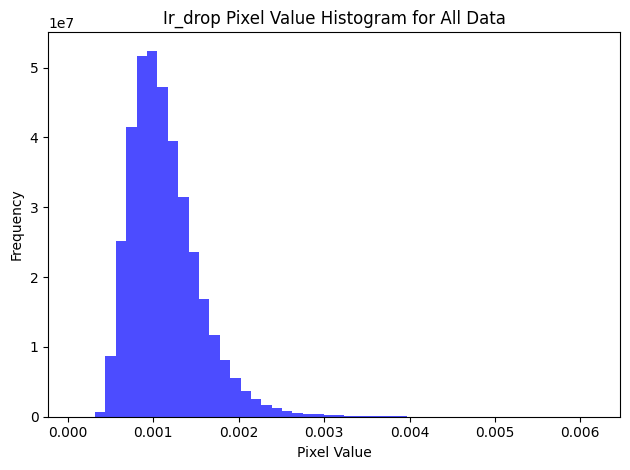

/data/BeGAN-circuit-benchmarks/nangate45/set2_numpy/data

Generating histogram for file type: ir_drop
Pixel value statistics for ir_drop:
Min: 0.000140736, Max: 0.00797865, Mean: 0.0011482709970901507, Std: 0.000582684211280432


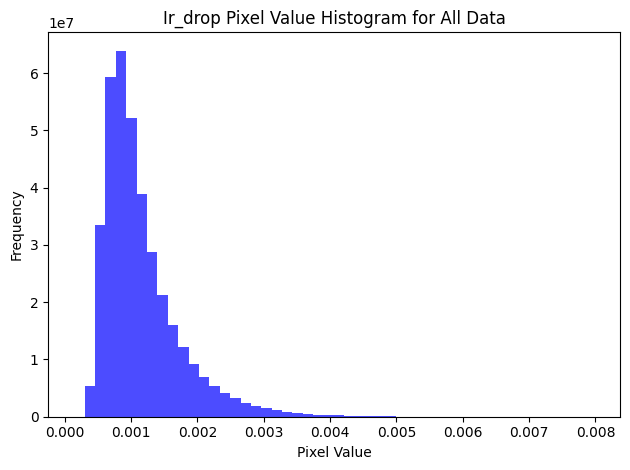

In [11]:

# Paths for set1_numpy and set2_numpy
set1_path = '/data/BeGAN-circuit-benchmarks/nangate45/set1_numpy'
set2_path = '/data/BeGAN-circuit-benchmarks/nangate45/set2_numpy'
# Load data for both sets
# file_types = ['current', 'eff_dist', 'pdn_density', 'ir_drop']
file_types = ['ir_drop']
set1_data_by_type = load_numpy_files_by_type(set1_path,file_types)
plot_pixel_value_histograms_for_all_data(set1_data_by_type, file_types)
set2_data_by_type = load_numpy_files_by_type(set2_path,file_types)
plot_pixel_value_histograms_for_all_data(set2_data_by_type, file_types)



Generating histogram for file type: ir_drop_map
Pixel value statistics for ir_drop_map:
Min: 0.000118411, Max: 0.00589958, Mean: 0.0015349788339814449, Std: 0.0008433448661457619


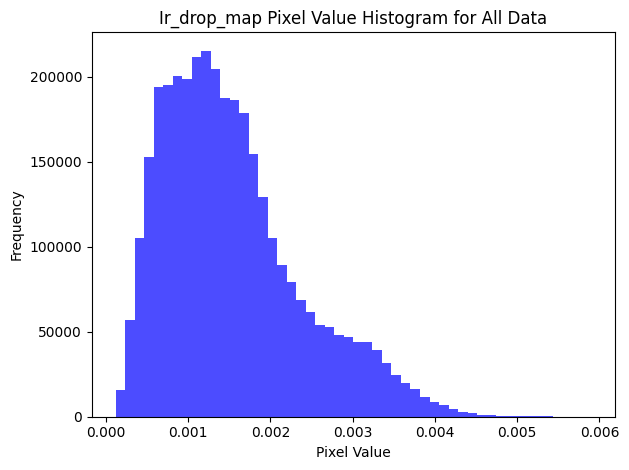

In [16]:
# Example usage:
root_path = '/data/ICCAD_2023/real-circuit-data_20230615/'  # Adjust this to your folder path
# file_types = ['current_map', 'eff_dist_map', 'pdn_density', 'ir_drop_map']  # Define your file types
file_types = ['ir_drop_map']  # Define your file types
all_testcase_data_by_type = load_numpy_files_by_type(root_path, file_types,)
# Plot histograms for all file types across all test cases
plot_pixel_value_histograms_for_all_data(all_testcase_data_by_type, file_types)



Generating histogram for file type: ir_drop_map
Pixel value statistics for ir_drop_map:
Min: 0.0, Max: 1.0, Mean: 0.32938830160163934, Std: 0.1867235859306548


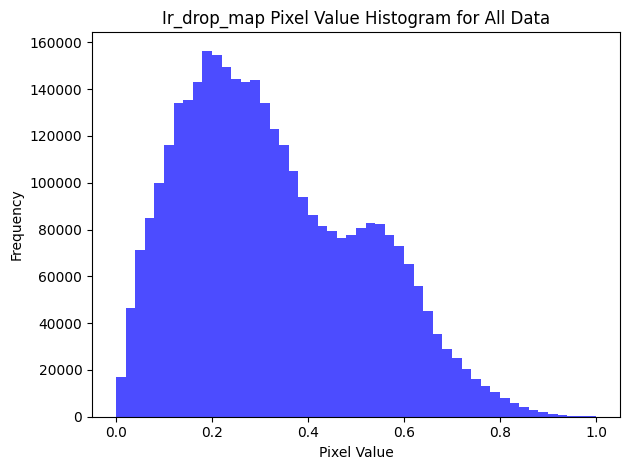

In [14]:
# Example usage:
root_path = '/data/ICCAD_2023/real-circuit-data_20230615/'  # Adjust this to your folder path
# file_types = ['current_map', 'eff_dist_map', 'pdn_density', 'ir_drop_map']  # Define your file types
file_types = ['ir_drop_map']  # Define your file types
all_testcase_data_by_type = load_numpy_files_by_type(root_path, file_types,norm_out=True)
# Plot histograms for all file types across all test cases
plot_pixel_value_histograms_for_all_data(all_testcase_data_by_type, file_types)




Generating histogram for file type: voltage_map_regular
Pixel value statistics for voltage_map_regular:
Min: 0.003465, Max: 0.04832, Mean: 0.019994276669651107, Std: 0.009742456117599895


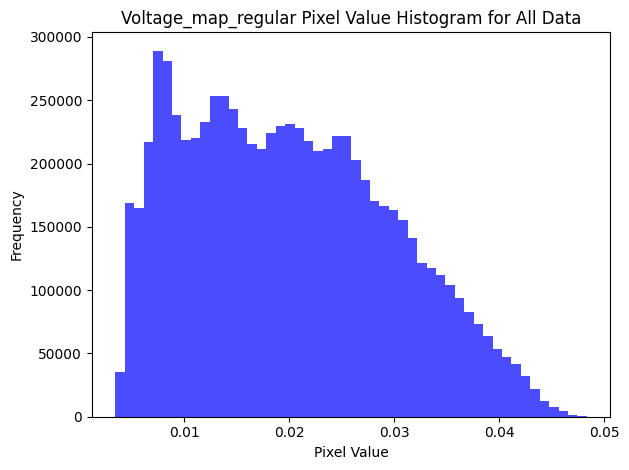

In [4]:
# Example usage:
root_path = '/data/BeGAN-circuit-benchmarks/asap7/numpy_data'  # Adjust this to your folder path
# file_types = ['current_map', 'eff_dist_map', 'pdn_density', 'ir_drop_map']  # Define your file types
file_types = ['voltage_map_regular']  # Define your file types
all_testcase_data_by_type = load_numpy_files_by_type(root_path, file_types,norm_out=False)
# Plot histograms for all file types across all test cases
plot_pixel_value_histograms_for_all_data(all_testcase_data_by_type, file_types)




Generating histogram for file type: ir_drop_map
Pixel value statistics for ir_drop_map:
Min: 0.000118411, Max: 0.00589958, Mean: 0.0015349788339814449, Std: 0.0008433448661457619


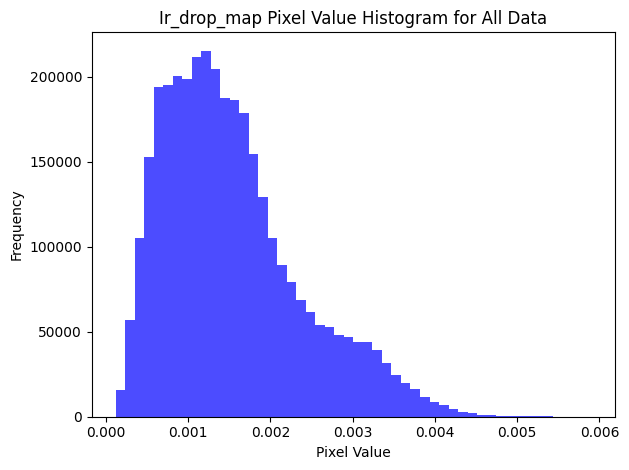

In [19]:
# Example usage:
root_path = '/data/ICCAD_2023/real-circuit-data_20230615/'  # Adjust this to your folder path
# file_types = ['current_map', 'eff_dist_map', 'pdn_density', 'ir_drop_map']  # Define your file types
file_types = ['ir_drop_map']  # Define your file types
all_testcase_data_by_type = load_numpy_files_by_type(root_path, file_types,norm_out=True,denorm=True)
# Plot histograms for all file types across all test cases
plot_pixel_value_histograms_for_all_data(all_testcase_data_by_type, file_types)



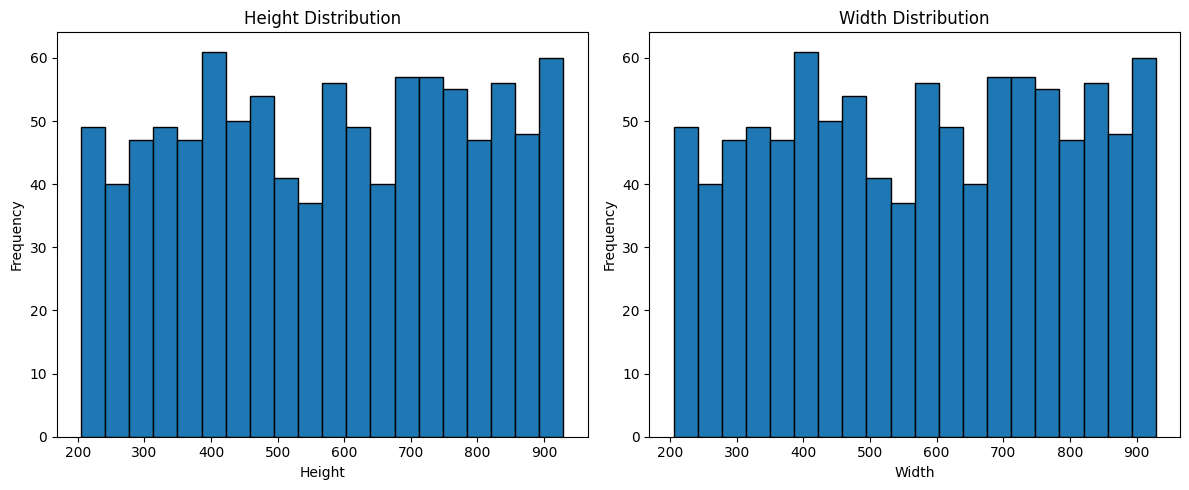

Height - Mean: 576.50, Median: 584.50, Min: 205, Max: 929
Width  - Mean: 576.50, Median: 584.50, Min: 205, Max: 929


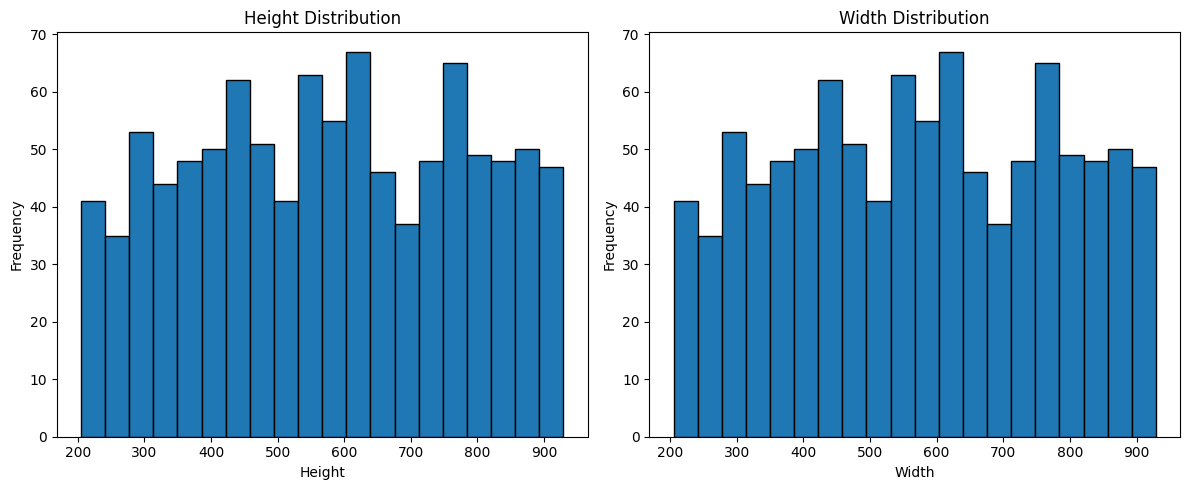

Height - Mean: 574.25, Median: 574.00, Min: 205, Max: 929
Width  - Mean: 574.25, Median: 574.00, Min: 205, Max: 929


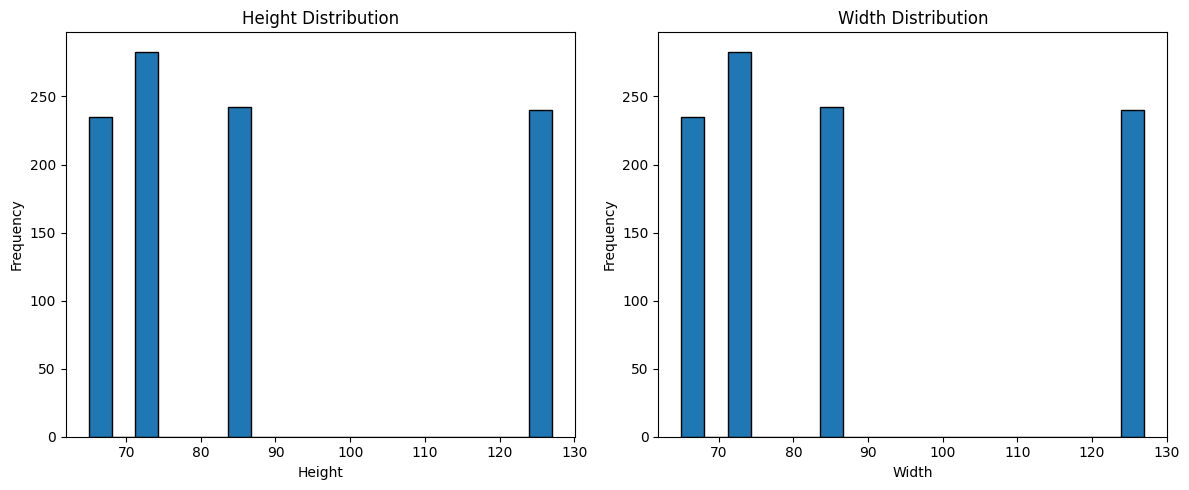

Height - Mean: 87.27, Median: 74.00, Min: 65, Max: 127
Width  - Mean: 87.27, Median: 74.00, Min: 65, Max: 127


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def plot_current_map_distribution(folder_path):
    # current_map 파일들의 경로를 찾습니다
    current_map_files = glob(os.path.join(folder_path, '*current*.npy'))
    
    heights = []
    widths = []
    
    # 각 파일에 대해 높이와 너비를 추출합니다
    for file in current_map_files:
        current_map = np.load(file)
        heights.append(current_map.shape[0])
        widths.append(current_map.shape[1])
    
    # 히스토그램 그리기
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.hist(heights, bins=20, edgecolor='black')
    ax1.set_title('Height Distribution')
    ax1.set_xlabel('Height')
    ax1.set_ylabel('Frequency')
    
    ax2.hist(widths, bins=20, edgecolor='black')
    ax2.set_title('Width Distribution')
    ax2.set_xlabel('Width')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # 기본 통계 출력
    print(f"Height - Mean: {np.mean(heights):.2f}, Median: {np.median(heights):.2f}, Min: {np.min(heights)}, Max: {np.max(heights)}")
    print(f"Width  - Mean: {np.mean(widths):.2f}, Median: {np.median(widths):.2f}, Min: {np.min(widths)}, Max: {np.max(widths)}")

# 함수 사용 예시
plot_current_map_distribution('/data/BeGAN-circuit-benchmarks/nangate45/set1_numpy/data')
plot_current_map_distribution('/data/BeGAN-circuit-benchmarks/nangate45/set2_numpy/data')
plot_current_map_distribution('/data/BeGAN-circuit-benchmarks/asap7/numpy_data/BeGAN')


### Dev modules

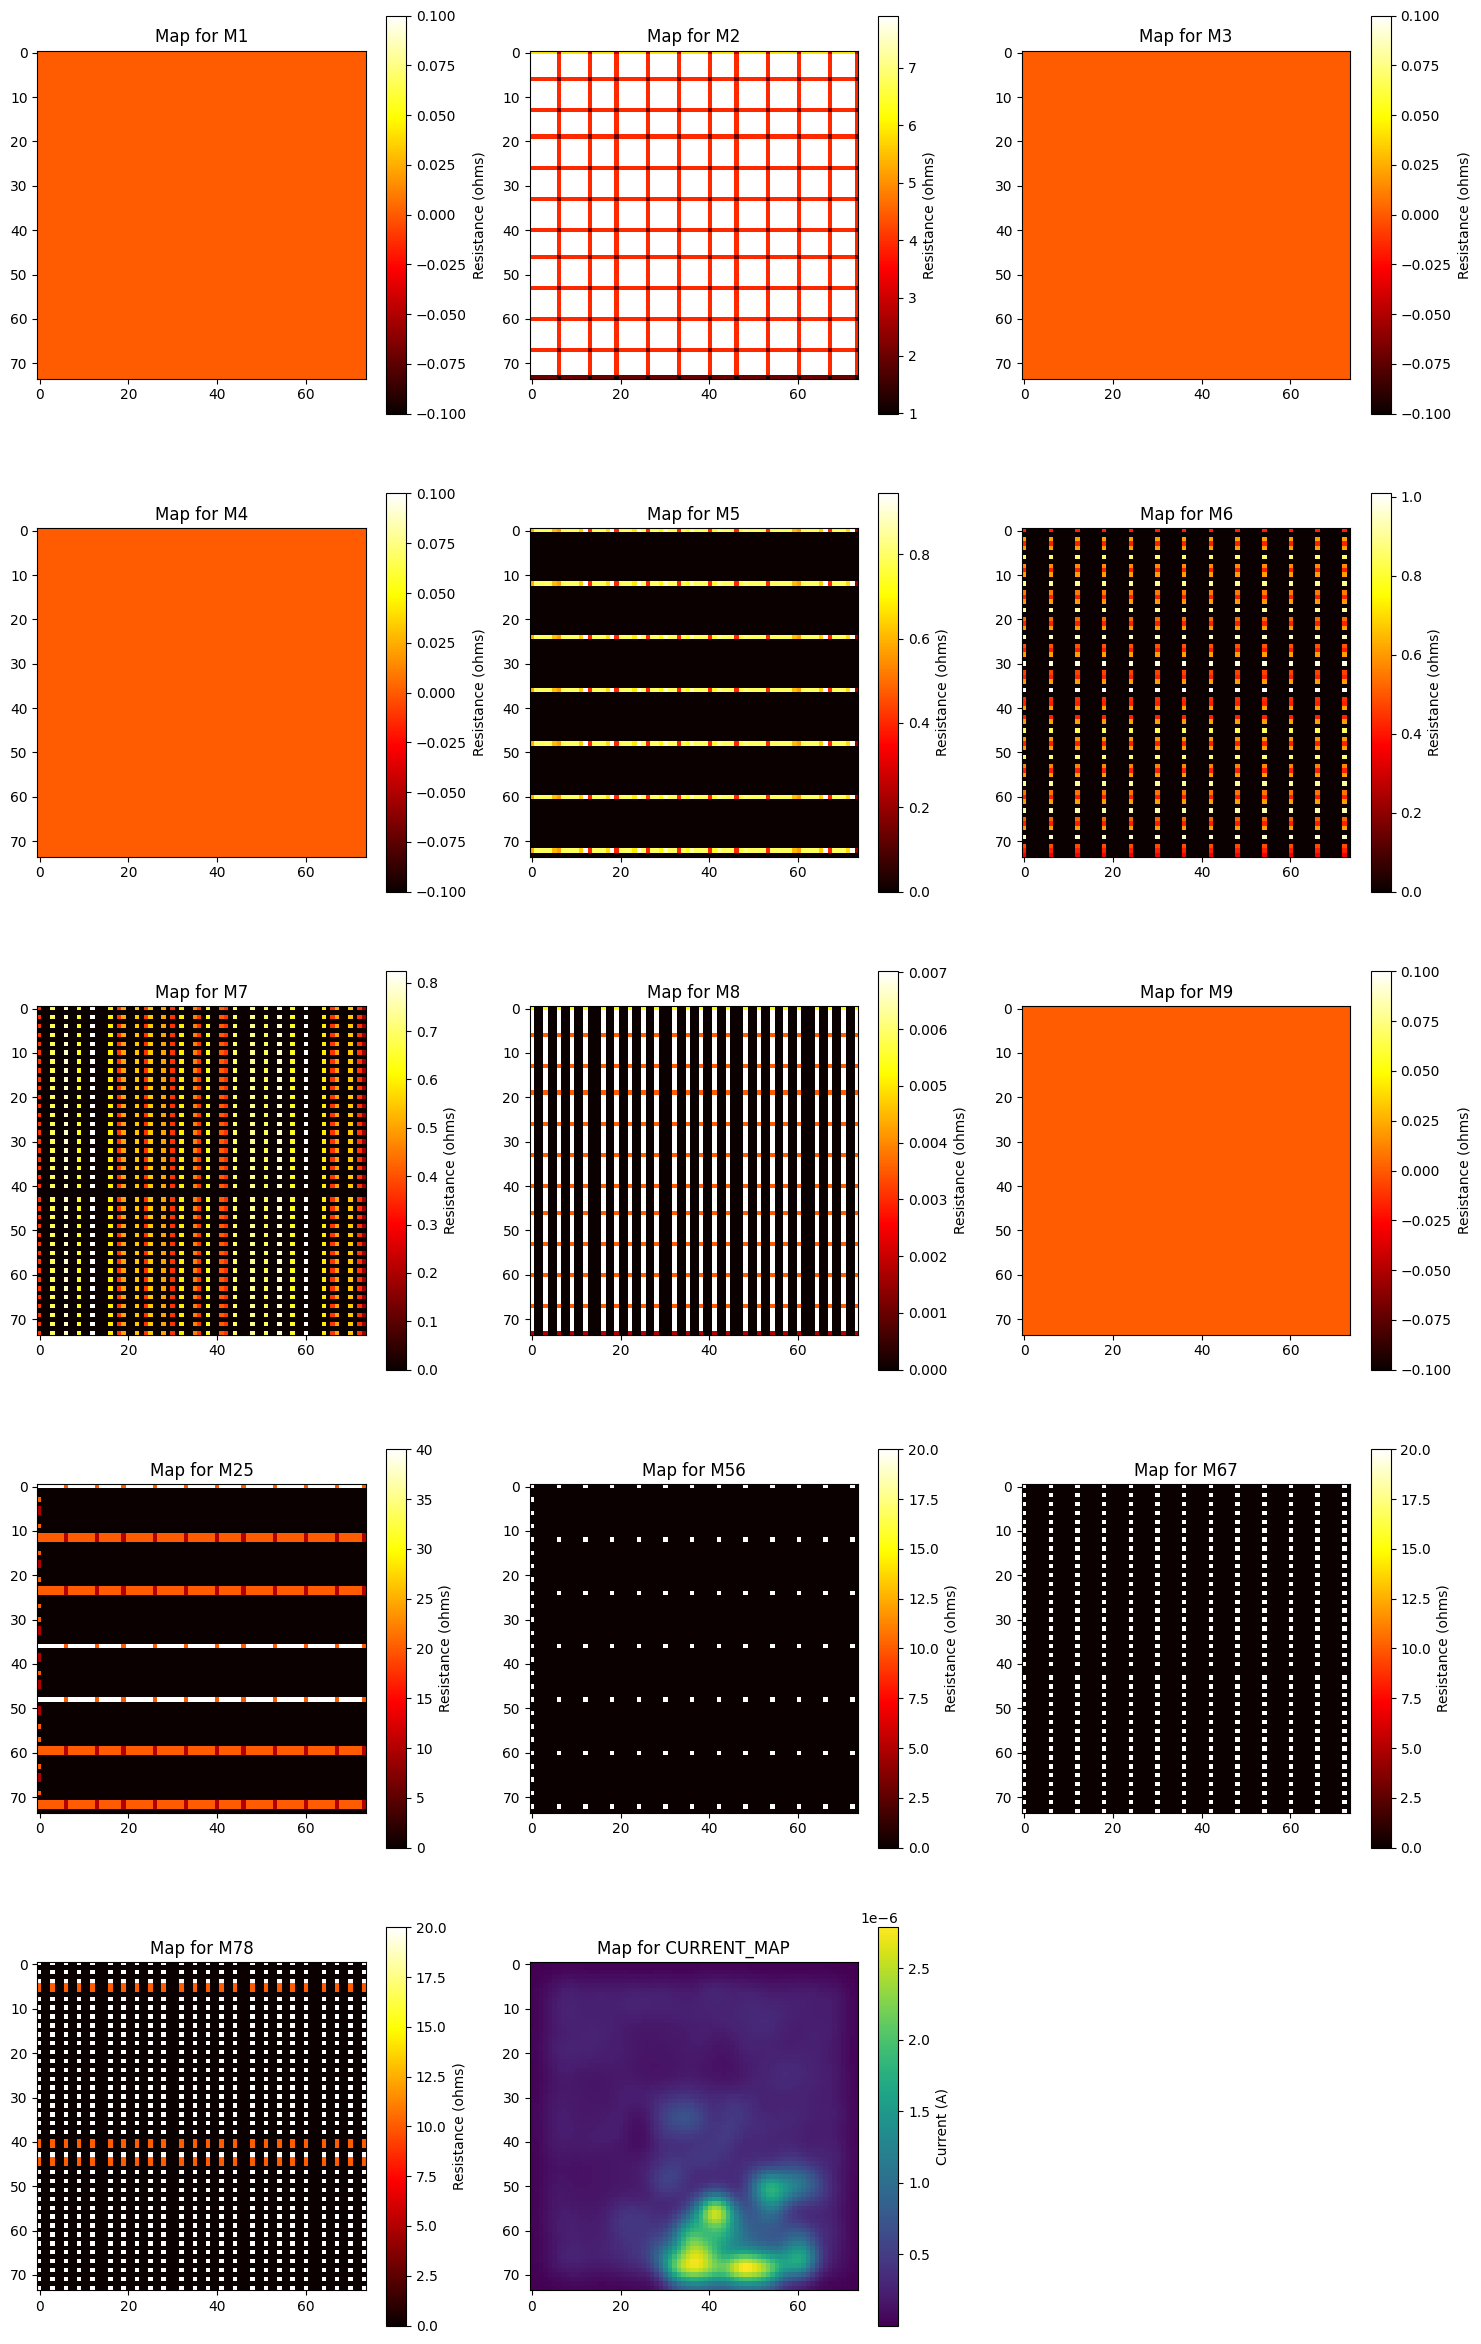

Process completed. Resistance matrices displayed.


In [3]:
import os
from eda_modules.resistance_map import EDA,VIA_LAYERS_ASAP7

root = '/data/real-circuit-benchmarks/asap7/data/'
current_map_path = 'ibex_current_map.csv.gz'
sp_file_path = 'ibex_reg_grid.sp.gz'
# root = '/data/real-circuit-benchmarks/nangate45/data/'
# current_map_path = 'aes_current_reg.csv.gz'
# sp_file_path = 'aes_reg.sp.gz'
eda = EDA(current_map_path=os.path.join(root, current_map_path),
        sp_file_path=os.path.join(root, sp_file_path),
        output_dir='output_dir', show_only=True, grid_mode=True, grid_col=3, show_current=True, 
        show_all_layers=True, via_layer_map=VIA_LAYERS_ASAP7)
eda.process_spice_file()


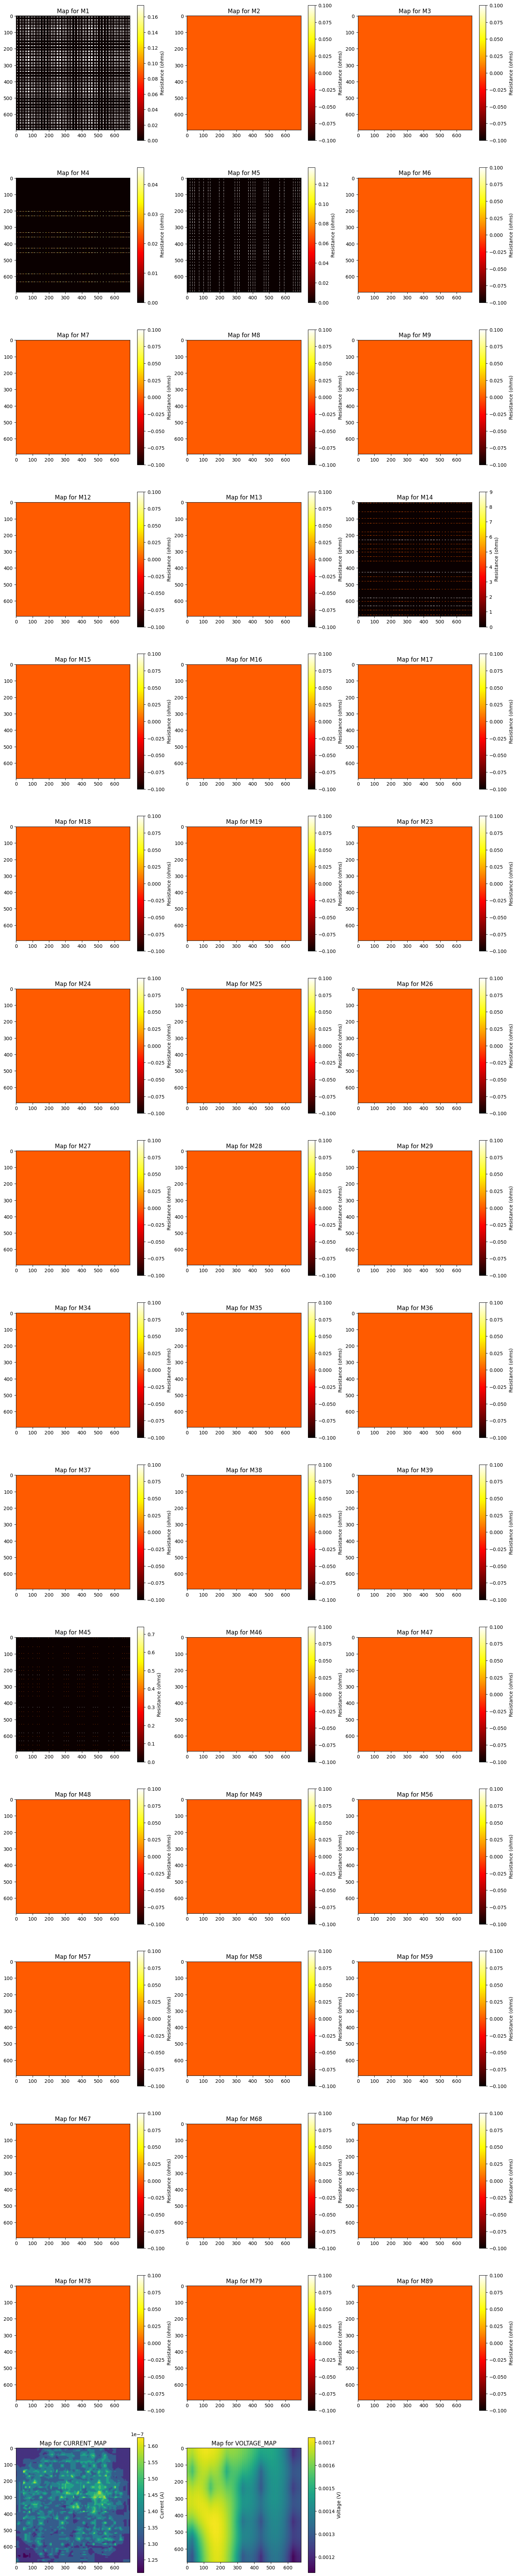

Process completed. Resistance matrices displayed.


In [9]:
import os
from eda_modules.resistance_map import EDA,VIA_LAYERS_ASAP7,VIA_LAYERS_ALL

id = 751
root = '/data/BeGAN-circuit-benchmarks/sky130hd/data/'
current_map_path = f'BeGAN_{id:03d}_current_map.csv.gz'
sp_file_path = f'BeGAN_{id:03d}_reg_grid.sp.gz'
voltage_map_path=os.path.join(root,f'BeGAN_{id:03d}_voltage_map_regular.csv.gz')
# root = '/data/real-circuit-benchmarks/nangate45/data/'
# current_map_path = 'aes_current_reg.csv.gz'
# sp_file_path = 'aes_reg.sp.gz'
eda = EDA(current_map_path=os.path.join(root, current_map_path),
        sp_file_path=os.path.join(root, sp_file_path),
        output_dir='output_dir', show_only=True, grid_mode=True, grid_col=3, show_current=True, 
        show_all_layers=True, via_layer_map=VIA_LAYERS_ALL,voltage_map_path=voltage_map_path)
eda.process_spice_file()


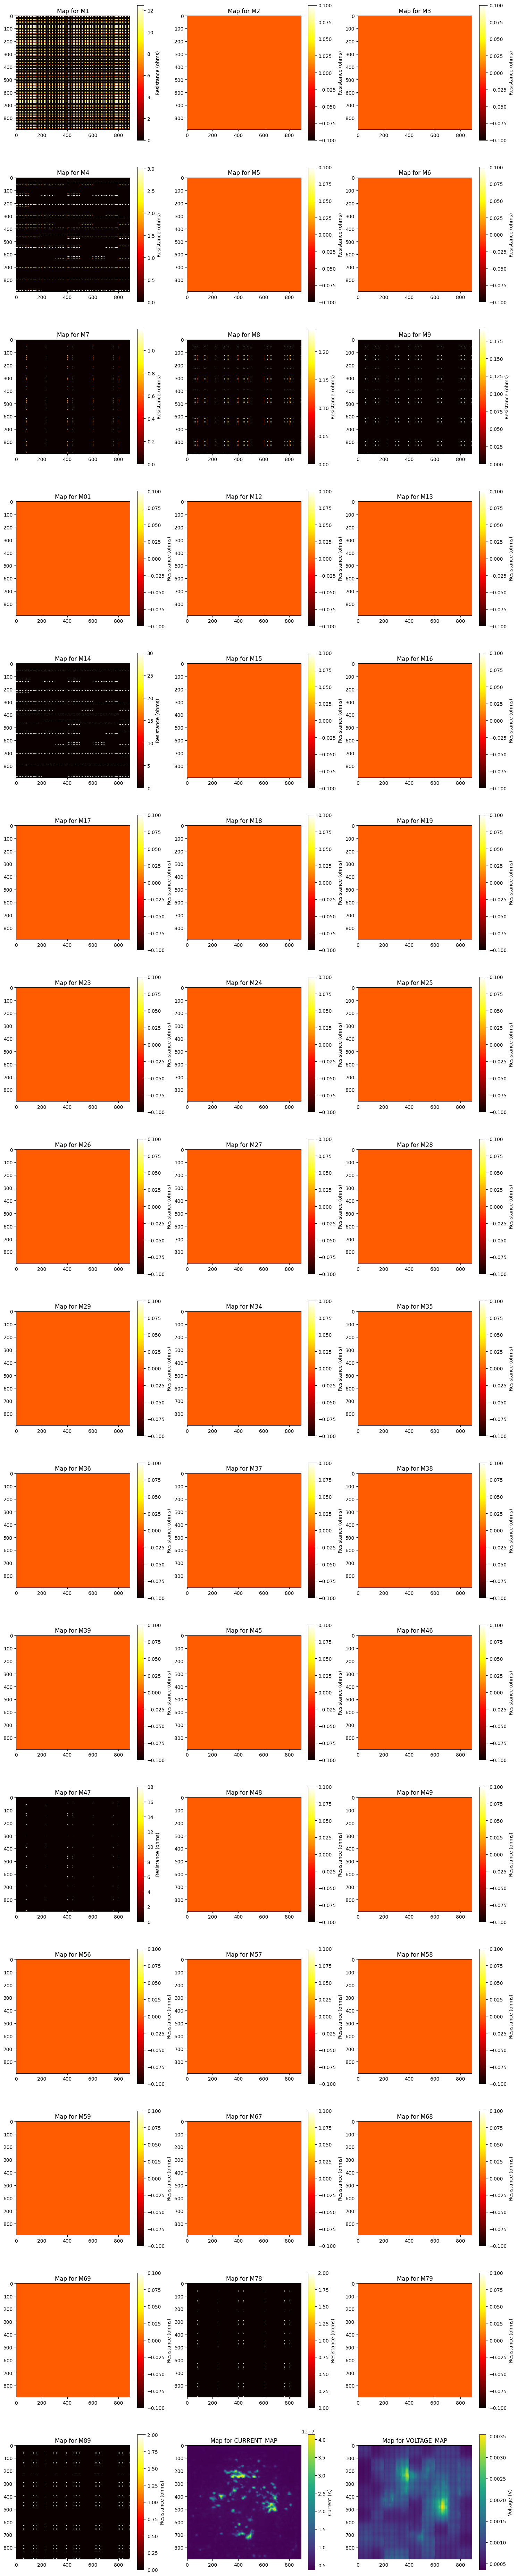

Process completed. Resistance matrices displayed.


In [1]:
import os
from eda_modules.resistance_map import EDA,VIA_LAYERS_ASAP7,VIA_LAYERS_ALL

id = 751
root = '/data/BeGAN-circuit-benchmarks/nangate45/set1/data/'
current_map_path = f'BeGAN_{id:04d}_current.csv.gz'
sp_file_path = f'BeGAN_{id:04d}.sp.gz'
voltage_map_path=os.path.join(root,f'BeGAN_{id:04d}_ir_drop.csv.gz')
# root = '/data/real-circuit-benchmarks/nangate45/data/'
# current_map_path = 'aes_current_reg.csv.gz'
# sp_file_path = 'aes_reg.sp.gz'
eda = EDA(current_map_path=os.path.join(root, current_map_path),
        sp_file_path=os.path.join(root, sp_file_path),
        output_dir='output_dir', show_only=True, grid_mode=True, grid_col=3, show_current=True, 
        show_all_layers=True, via_layer_map=VIA_LAYERS_ALL,voltage_map_path=voltage_map_path)
eda.process_spice_file()


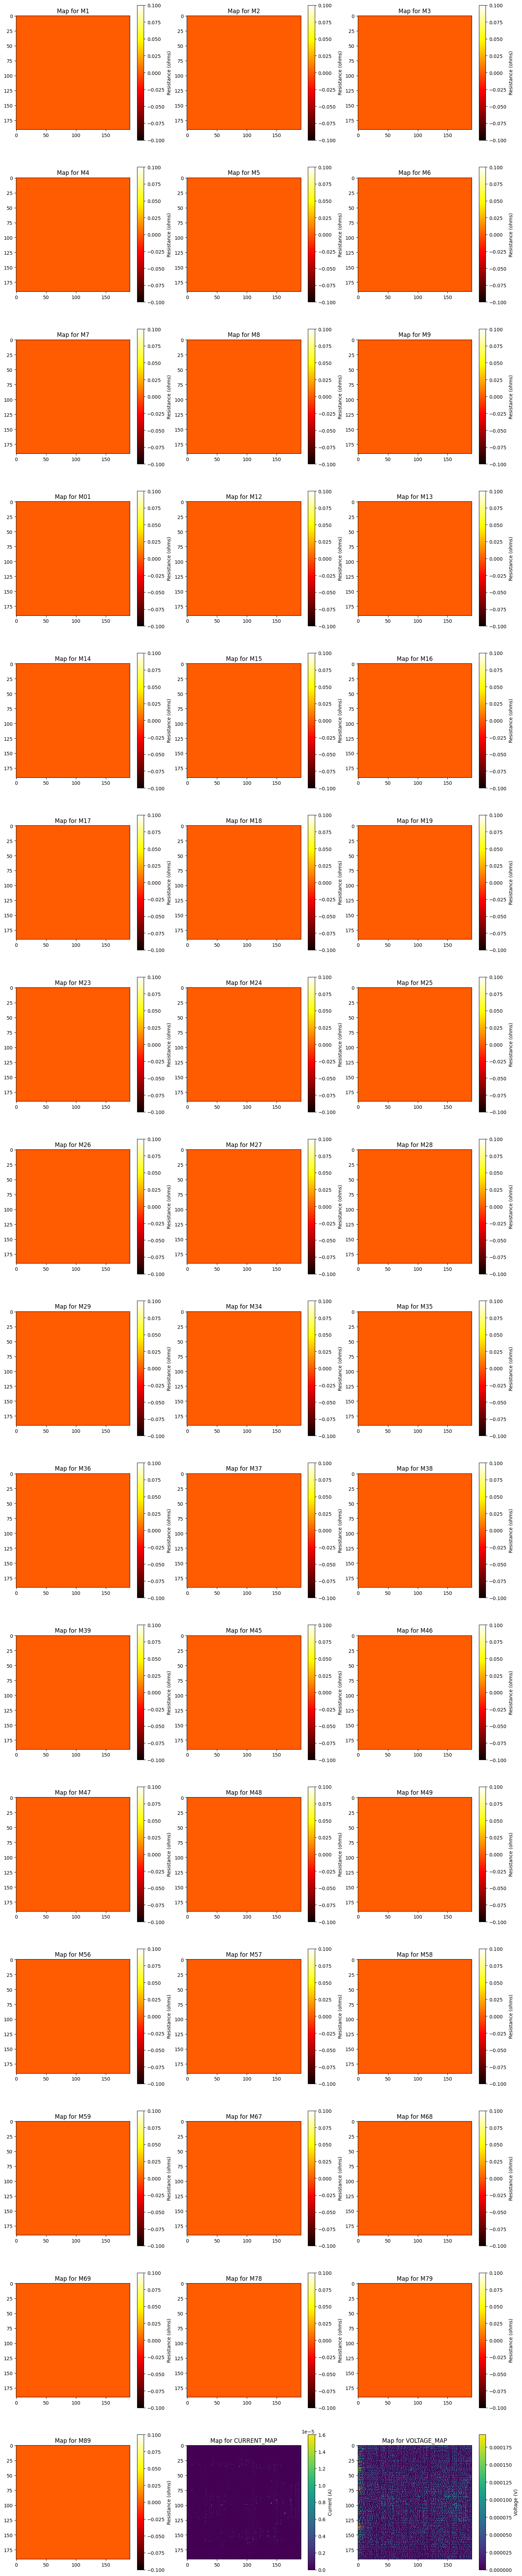

Process completed. Resistance matrices displayed.


In [2]:
import os
from eda_modules.resistance_map import EDA,VIA_LAYERS_ASAP7,VIA_LAYERS_ALL

id = 1
root = '/data/gen_pdn/210nm/'
resi_path = '/data/gen_pdn/layer_data'
current_map_path = f'{id}_power.csv'
sp_file_path = f'{id}_resistance.sp'
voltage_map_path=os.path.join(root,f'{id}_irdrop.csv')
# root = '/data/real-circuit-benchmarks/nangate45/data/'
# current_map_path = 'aes_current_reg.csv.gz'
# sp_file_path = 'aes_reg.sp.gz'
eda = EDA(current_map_path=os.path.join(root, current_map_path),
        sp_file_path=os.path.join(resi_path, sp_file_path),
        output_dir='output_dir', show_only=True, grid_mode=True, grid_col=3, show_current=True, 
        show_all_layers=True, via_layer_map=VIA_LAYERS_ALL,voltage_map_path=voltage_map_path,
        match_str=r"R\d+\s+m(\d+)_(\d+)_(\d+)\s+m(\d+)_(\d+)_(\d+)\s+([\d.]+)")
eda.process_spice_file()


(380, 380)


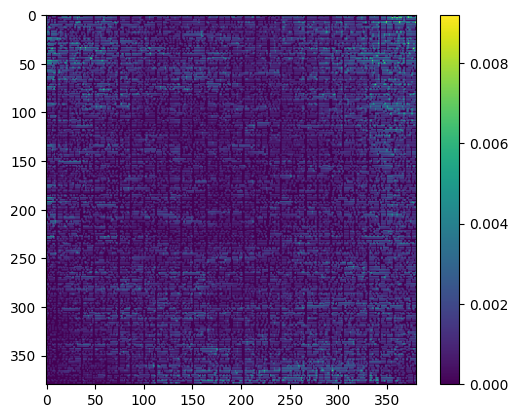

In [12]:
folders = ['1um','500nm','200nm','100nm']
path = f"/data/pdn_3rd_4types/{folders[3]}_numpy/80_ir_drop.npy"
a = np.load(path)
print(a.shape)
plt.imshow(a)
plt.colorbar()

   Index  MapCount
0     32        23
1     78        23
2      4        23
3     48        23
4     72        23
..   ...       ...
85    77        23
86    23        23
87    64        23
88    18        23
89    22        23

[90 rows x 2 columns]


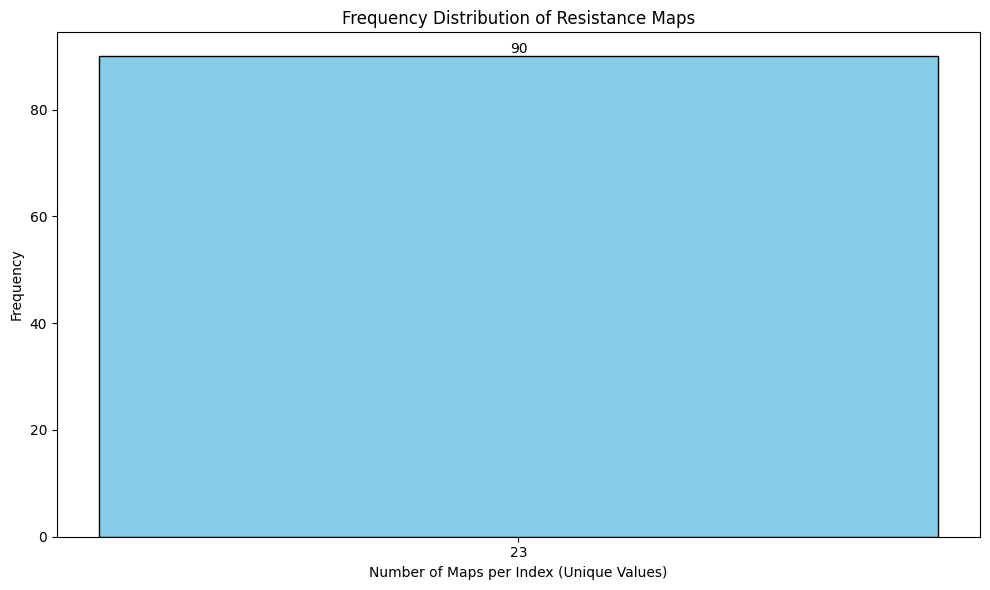

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

class ResistanceMapAnalyzer:
    def __init__(self, layer_data_path):
        self.layer_data_path = layer_data_path

    def analyze_resistance_maps(self):
        resistance_count = defaultdict(int)

        for file_name in os.listdir(self.layer_data_path):
            if file_name.endswith('.npy'):
                # Extract the index from the file name
                index = file_name.split('_')[0]
                resistance_count[index] += 1

        # Convert to DataFrame
        df = pd.DataFrame(list(resistance_count.items()), columns=['Index', 'MapCount'])
        df = df.sort_values(by='MapCount', ascending=False).reset_index(drop=True)
        df_ori = df.copy()
        # Get frequency of unique values in MapCount
        frequency_df = df['MapCount'].value_counts().reset_index()
        frequency_df.columns = ['UniqueMapCount', 'Frequency']
        frequency_df = frequency_df.sort_values(by='UniqueMapCount').reset_index(drop=True)

        return frequency_df,df_ori

    def plot_histogram(self, df):
        plt.figure(figsize=(10, 6))
        bars = plt.bar(df['UniqueMapCount'], df['Frequency'], color='skyblue', edgecolor='black')

        # Add labels to bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

        plt.xlabel('Number of Maps per Index (Unique Values)')
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of Resistance Maps')
        plt.xticks(df['UniqueMapCount'])
        plt.tight_layout()
        plt.show()

# Main Execution
folders = ['1um','500nm','200nm','100nm']
for folder in folders:
    layer_data_path = f"/data/pdn_3rd_4types/{folder}_numpy/layer_data"  # Adjust path as needed
    analyzer = ResistanceMapAnalyzer(layer_data_path)

    # Analyze resistance maps
    df,df_ori = analyzer.analyze_resistance_maps()
    print(df_ori)

    # Plot histogram
    analyzer.plot_histogram(df)
    break

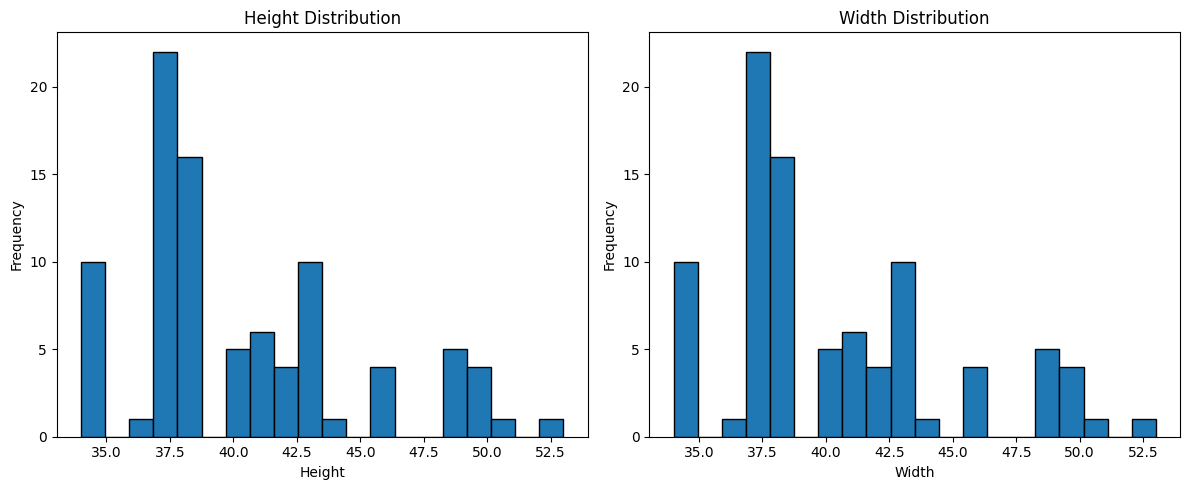

Height - Mean: 40.21, Median: 38.00, Min: 34, Max: 53
Width  - Mean: 40.21, Median: 38.00, Min: 34, Max: 53


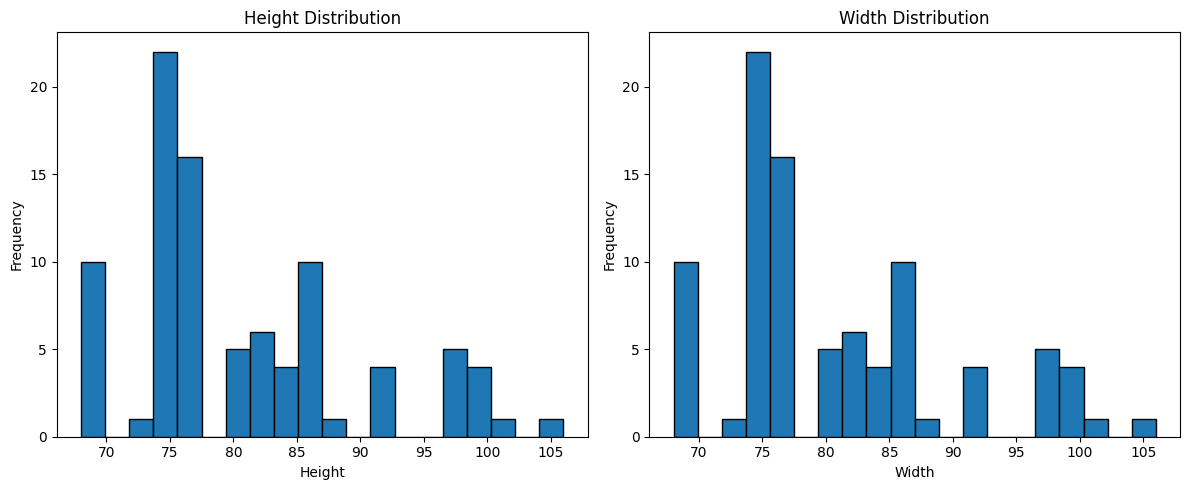

Height - Mean: 80.42, Median: 76.00, Min: 68, Max: 106
Width  - Mean: 80.42, Median: 76.00, Min: 68, Max: 106


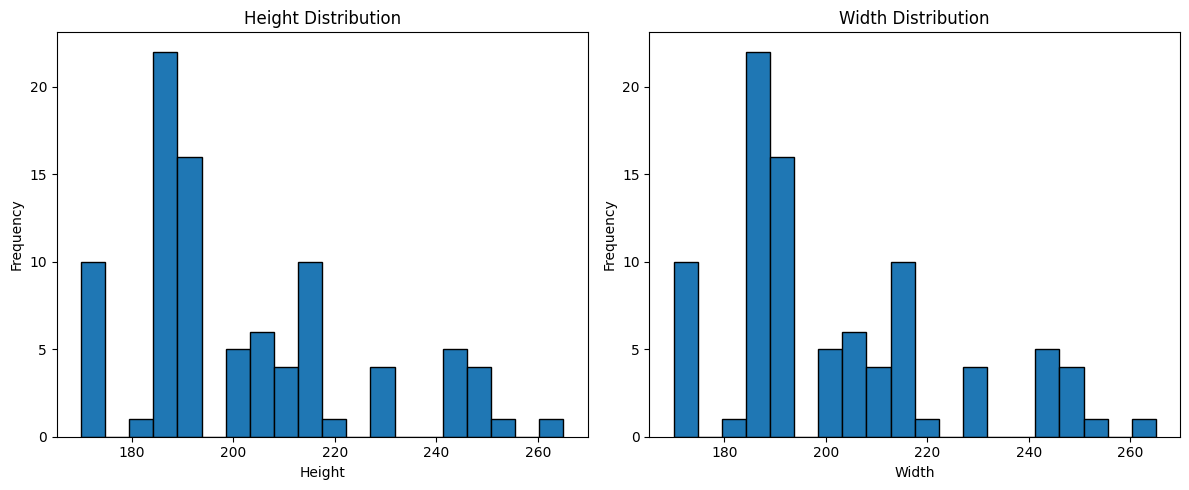

Height - Mean: 201.06, Median: 190.00, Min: 170, Max: 265
Width  - Mean: 201.06, Median: 190.00, Min: 170, Max: 265


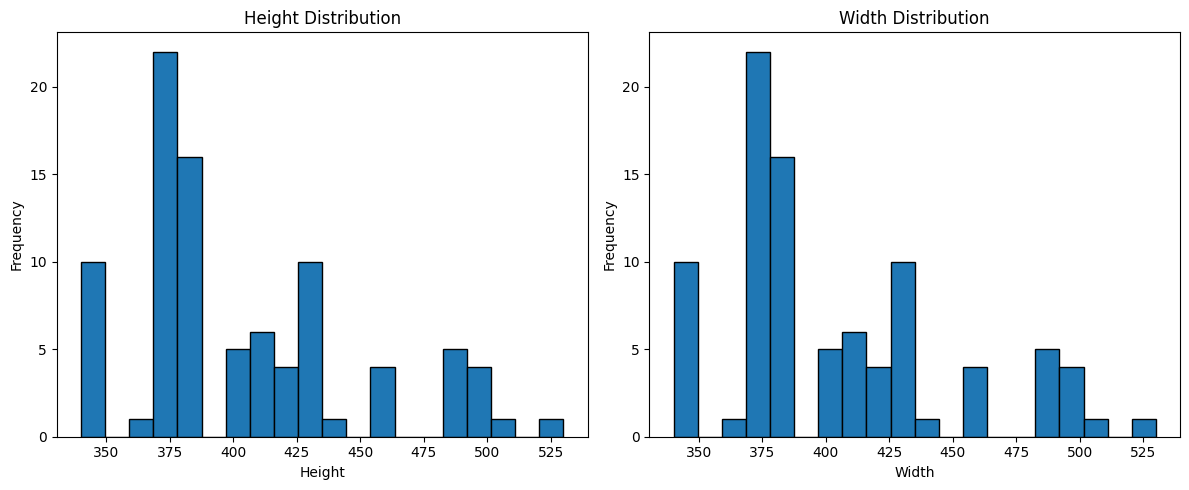

Height - Mean: 402.11, Median: 380.00, Min: 340, Max: 530
Width  - Mean: 402.11, Median: 380.00, Min: 340, Max: 530


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def plot_current_map_distribution(folder_path):
    # current_map 파일들의 경로를 찾습니다
    current_map_files = glob(os.path.join(folder_path, '*current*.npy'))
    
    heights = []
    widths = []
    
    # 각 파일에 대해 높이와 너비를 추출합니다
    for file in current_map_files:
        current_map = np.load(file)
        heights.append(current_map.shape[0])
        widths.append(current_map.shape[1])
    
    # 히스토그램 그리기
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.hist(heights, bins=20, edgecolor='black')
    ax1.set_title('Height Distribution')
    ax1.set_xlabel('Height')
    ax1.set_ylabel('Frequency')
    
    ax2.hist(widths, bins=20, edgecolor='black')
    ax2.set_title('Width Distribution')
    ax2.set_xlabel('Width')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # 기본 통계 출력
    print(f"Height - Mean: {np.mean(heights):.2f}, Median: {np.median(heights):.2f}, Min: {np.min(heights)}, Max: {np.max(heights)}")
    print(f"Width  - Mean: {np.mean(widths):.2f}, Median: {np.median(widths):.2f}, Min: {np.min(widths)}, Max: {np.max(widths)}")


folders = ['1um','500nm','200nm','100nm']
for folder in folders:
    layer_data_path = f"/data/pdn_3rd_4types/{folder}_numpy"  # Adjust path as needed
    plot_current_map_distribution(layer_data_path)


In [42]:
import os
import glob

class DatasetManager:
    def __init__(self, root_path, selected_folders, post_fix):
        self.root_path = root_path
        self.selected_folders = selected_folders
        self.post_fix = post_fix

    def _find_files(self):
        data_files = []

        # Initialize dictionaries to store files by type
        file_groups = {
            'current': [],
            'eff_dist': [],
            'pdn_density': [],
            'ir_drop': [],
            'resistance': []
        }

        # Collect files from selected folders
        for folder in self.selected_folders:
            folder_path = os.path.join(self.root_path, folder, self.post_fix)

            # Use glob to collect files for each type
            file_groups['current'].extend(glob.glob(os.path.join(folder_path, '*_current*.npy')))
            file_groups['ir_drop'].extend(glob.glob(os.path.join(folder_path, '*_ir_drop*.npy')))
            file_groups['resistance'].extend(glob.glob(os.path.join(folder_path, 'layer_data', '*resistance*.npy')))

        # Sort all file lists
        for key in file_groups:
            file_groups[key].sort()

        # Organize resistance files into a dictionary of lists indexed by layer index
        resistance_files_dict = {}
        for file_path in file_groups['resistance']:
            file_name = os.path.basename(file_path)
            index = file_name.split('_')[0]  # Assume index is the first part of the file name
            if index not in resistance_files_dict:
                resistance_files_dict[index] = []
            resistance_files_dict[index].append(file_path)

        # Ensure file counts match (except resistance, which can vary by index)
        if not (len(file_groups['current']) == len(file_groups['ir_drop'])):
            raise ValueError("Mismatch in the number of files for current, eff_dist, pdn_density, and ir_drop!")

        # Pair files into data entries
        for current, ir_drop in zip(
            file_groups['current'], file_groups['ir_drop']
        ):
            # Get the index from the file name (assuming consistent naming conventions)
            index = os.path.basename(current).split('_')[0]

            # Add all resistance files matching the current index
            resistances = resistance_files_dict.get(index, [])

            data_files.append({
                'current': current,
                'ir_drop': ir_drop,
                'resistances': resistances
            })

        return data_files

# Main Execution
root_path = "/data/gen_pdn"
selected_folders = ["1um_numpy", "210nm_numpy"]
post_fix = ""

manager = DatasetManager(root_path, selected_folders, post_fix)
data_files = manager._find_files()

for data in data_files:
    print(data)


{'current': '/data/gen_pdn/1um_numpy/10_current.npy', 'ir_drop': '/data/gen_pdn/1um_numpy/10_ir_drop.npy', 'resistances': ['/data/gen_pdn/1um_numpy/layer_data/10_m0_resistance.npy', '/data/gen_pdn/1um_numpy/layer_data/10_m0_to_m1_via_resistance.npy', '/data/gen_pdn/1um_numpy/layer_data/10_m1_to_m2_via_resistance.npy', '/data/gen_pdn/1um_numpy/layer_data/10_m2_to_m3_via_resistance.npy', '/data/gen_pdn/1um_numpy/layer_data/10_m3_resistance.npy', '/data/gen_pdn/1um_numpy/layer_data/10_m3_to_m4_via_resistance.npy', '/data/gen_pdn/1um_numpy/layer_data/10_m4_resistance.npy', '/data/gen_pdn/210nm_numpy/layer_data/10_m0_resistance.npy', '/data/gen_pdn/210nm_numpy/layer_data/10_m0_to_m1_via_resistance.npy', '/data/gen_pdn/210nm_numpy/layer_data/10_m1_to_m2_via_resistance.npy', '/data/gen_pdn/210nm_numpy/layer_data/10_m2_to_m3_via_resistance.npy', '/data/gen_pdn/210nm_numpy/layer_data/10_m3_resistance.npy', '/data/gen_pdn/210nm_numpy/layer_data/10_m3_to_m4_via_resistance.npy', '/data/gen_pdn/210